In [23]:
def c_to_f(c):
    return c*9/5 + 32

In [24]:
import time
start_time = time.time()
c_to_f(43)
time_taken = time.time() - start_time
print(time_taken,'s')

0.0 s


In [25]:
from itertools import accumulate
L = list(accumulate(range(8),lambda x,_: x*10,initial = 1))

In [26]:
L

[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

In [27]:
def time_wrappper(f,L):
    print('Timing',f.__name__)
    for i in L:
        s_t = time.time()
        f(i)
        dt = time.time() - s_t
        print(f"{f.__name__}({i}) takes about {dt} sec")

In [28]:
time_wrappper(c_to_f,L)

Timing c_to_f
c_to_f(1) takes about 0.0 sec
c_to_f(10) takes about 0.0 sec
c_to_f(100) takes about 0.0 sec
c_to_f(1000) takes about 0.0 sec
c_to_f(10000) takes about 0.0 sec
c_to_f(100000) takes about 0.0 sec
c_to_f(1000000) takes about 0.0 sec
c_to_f(10000000) takes about 0.0 sec
c_to_f(100000000) takes about 0.0 sec


In [29]:
def accumulated_sum(x):
    total = 0
    for i in range(x+1):
        total += i
    return total
    

In [30]:
time_wrappper(accumulated_sum,L)

Timing accumulated_sum
accumulated_sum(1) takes about 0.0 sec
accumulated_sum(10) takes about 0.0 sec
accumulated_sum(100) takes about 0.0 sec
accumulated_sum(1000) takes about 0.0 sec
accumulated_sum(10000) takes about 0.0009913444519042969 sec
accumulated_sum(100000) takes about 0.013988971710205078 sec
accumulated_sum(1000000) takes about 0.10399675369262695 sec
accumulated_sum(10000000) takes about 0.753040075302124 sec
accumulated_sum(100000000) takes about 8.996000528335571 sec


In [31]:
def square(n):
    sqsum = 0
    for i in range(n):
        for j in range(n):
            sqsum += 1
    return sqsum

In [32]:
time_wrappper(square,L)

Timing square
square(1) takes about 0.0 sec
square(10) takes about 0.0 sec
square(100) takes about 0.0010061264038085938 sec
square(1000) takes about 0.10798788070678711 sec


KeyboardInterrupt: 

In [33]:

## -------------------------------------------------- ##
## EXAMPLE: counting the number of operations
## -------------------------------------------------- ##

## constant fcn with counting the number of ops
def c_to_f(c):
    counter = 3
    return (counter, c*9.0/5 + 32)

# linear fcn  with counting the number of ops
def mysum(x):
    counter = 1
    total = 0
    for i in range(x+1):
        counter += 3
        total += i
    return (counter, total)

# quadratic fcn  with counting the number of ops
def square(n):
    counter = 1
    mysum = 0
    for i in range(n):
        counter += 1
        for j in range(n):
            counter += 3
            mysum += 1
    return (counter, mysum)

# helper function to show number of operations
def count_wrapper(f, L):
    print('Counting', f.__name__)
    for i in L:
        counter = f(i)[0]
        if i == min(L):
            multiplier = 1.0
        else:
            multiplier = counter/float(prev)
        prev = counter
        print(f"{f.__name__}({i}): {counter} ops, {round(multiplier,5)} x more")



In [36]:
L1 = [100]
for i in range(5):
    L1.append(L1[-1]*10)
L2_a = [128, 256, 512, 1024, 2048, 4096, 8192]
L2_b = [1, 10, 100, 1000, 10000]

In [37]:
count_wrapper(c_to_f, L1)
count_wrapper(mysum, L1)
count_wrapper(square, L2_a)
count_wrapper(square, L2_b)

Counting c_to_f
c_to_f(100): 3 ops, 1.0 x more
c_to_f(1000): 3 ops, 1.0 x more
c_to_f(10000): 3 ops, 1.0 x more
c_to_f(100000): 3 ops, 1.0 x more
c_to_f(1000000): 3 ops, 1.0 x more
c_to_f(10000000): 3 ops, 1.0 x more
Counting mysum
mysum(100): 304 ops, 1.0 x more
mysum(1000): 3004 ops, 9.88158 x more
mysum(10000): 30004 ops, 9.98802 x more
mysum(100000): 300004 ops, 9.9988 x more
mysum(1000000): 3000004 ops, 9.99988 x more
mysum(10000000): 30000004 ops, 9.99999 x more
Counting square
square(128): 49281 ops, 1.0 x more
square(256): 196865 ops, 3.99474 x more
square(512): 786945 ops, 3.99738 x more
square(1024): 3146753 ops, 3.99869 x more
square(2048): 12584961 ops, 3.99935 x more
square(4096): 50335745 ops, 3.99967 x more
square(8192): 201334785 ops, 3.99984 x more
Counting square
square(1): 5 ops, 1.0 x more
square(10): 311 ops, 62.2 x more
square(100): 30101 ops, 96.78778 x more
square(1000): 3001001 ops, 99.69772 x more
square(10000): 300010001 ops, 99.96998 x more


In [38]:
def m_to_kms(m):
    return m * 1.609

def compound(invest,interest,n_months):
    total = 0
    for i in range(n_months):
        total = total * interest + invest
    return total
    

In [39]:
L_3 = [1]
for i in range(7):
    L_3.append(L_3[-1]*10)


In [40]:
L_3

[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [ ]:
#if we change investment
for n in L_3:
    start_time = time.perf_counter()
    money = compound(n,1.05,12)
    dt = time.perf_counter() - start_time
    print(f"compound({n}) took {dt:.2e} sec")

compound(1) took 9.60e-06 sec
compound(10) took 5.70e-06 sec
compound(100) took 2.80e-06 sec
compound(1000) took 3.40e-06 sec
compound(10000) took 2.50e-06 sec
compound(100000) took 2.50e-06 sec
compound(1000000) took 2.50e-06 sec
compound(10000000) took 2.10e-06 sec


In [ ]:
# if we change n_months
for n in L_3:
    start_time = time.perf_counter()
    money = compound(10,1.05,n)
    dt = time.perf_counter() - start_time
    print(f"compound({n}) took {dt:.2e} sec")

#chane in n_months do change the time for operations to be done    

compound(1) took 3.28e-05 sec
compound(10) took 1.20e-05 sec
compound(100) took 2.06e-05 sec
compound(1000) took 2.39e-04 sec
compound(10000) took 2.56e-03 sec
compound(100000) took 2.09e-02 sec
compound(1000000) took 2.50e-01 sec
compound(10000000) took 1.12e+00 sec


In [ ]:
class Calculator(object):
    def __init__(self,name:str ,version:int) -> None:
        self.name = name
        self.version = version
    def get_info(self) -> str:
        return f'{self.name} Version:{self.version}'
    @staticmethod #for explanation idently.io @staticmethod video
    def add_all(*numbers:int) -> int:
        return sum(numbers)
    
        

In [48]:
calc:Calculator = Calculator('khan_calculator',12)
print(calc.get_info())
print(calc.add_all(1,2,3,4,5))

khan_calculator Version:12
15


In [49]:
from typing import Callable
from functools import wraps
from time import perf_counter


In [70]:
def get_time(func:Callable) -> Callable:
    @wraps(func)
    def wrapper(*args,**keywords) -> None:
        start_time = perf_counter()
        print(func(*args,**keywords))
        end_time = perf_counter()
        print(f"{func.__name__} took {end_time - start_time:.3f} sec")
    return wrapper
        

In [80]:
@get_time
def compound(invest,interest,n_months):
    total = 0
    for i in range(n_months):
        total = total * interest + invest
    return total



In [81]:
compound(10000000,1.05,12)


159171265.20442584
compound took 0.000 sec


In [ ]:
# Dataclasses video from idently.io
from dataclasses import dataclass


In [83]:
@dataclass
class Person:
    name:str
    age:int
    freinds:list[str]

Bob:Person = Person('Bob',29,['khan','Billa'])    

In [84]:
print(Bob)

Person(name='Bob', age=29, freinds=['khan', 'Billa'])


In [85]:
@dataclass
class rectangle:
    width:float
    height:float

    @property
    def area(self) -> float:
        return self.width * self.height
    @property 
    def perimeter(self) -> float:
        return 2*(self.width + self.height)
    
    def describe(self) -> None:
        print(f'{self}')
        print(f'Area:{self.area}')
        print(f'Perimeter:{self.perimeter}')
            





In [88]:
A:rectangle = rectangle(12,43)
A.describe()

rectangle(width=12, height=43)
Area:516
Perimeter:110


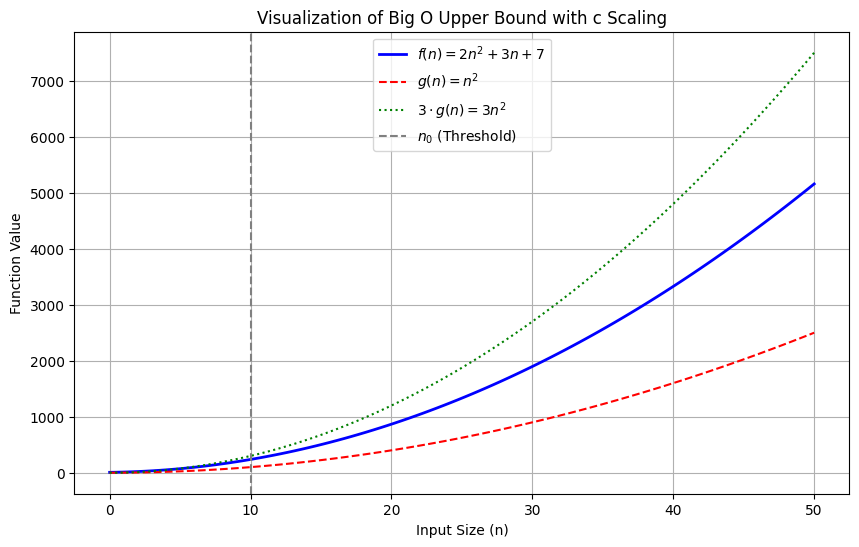

In [ ]:
#calculating upper bound and without c scalling and visualizing the effect
import numpy as np
import matplotlib.pyplot as plt

# Define functions
def f(n):
    return 2 * n**2 + 3 * n + 7  # Example function

def g(n, c=1):
    return c * n**2  # g(n) scaled by c

# Generate values for n
n_values = np.linspace(0, 50, 100)

# Compute function values
f_values = f(n_values)
g1_values = g(n_values, c=1)  # g(n) without scaling
g2_values = g(n_values, c=3)  # g(n) with a larger c

# Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(n_values, f_values, label=r'$f(n) = 2n^2 + 3n + 7$', color='blue', linewidth=2)
plt.plot(n_values, g1_values, label=r'$g(n) = n^2$', linestyle='dashed', color='red')
plt.plot(n_values, g2_values, label=r'$3 \cdot g(n) = 3n^2$', linestyle='dotted', color='green')

# Highlight the n0 threshold
plt.axvline(x=10, color='gray', linestyle='--', label=r'$n_0$ (Threshold)')

# Labels and legend
plt.xlabel("Input Size (n)")
plt.ylabel("Function Value")
plt.title("Visualization of Big O Upper Bound with c Scaling")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


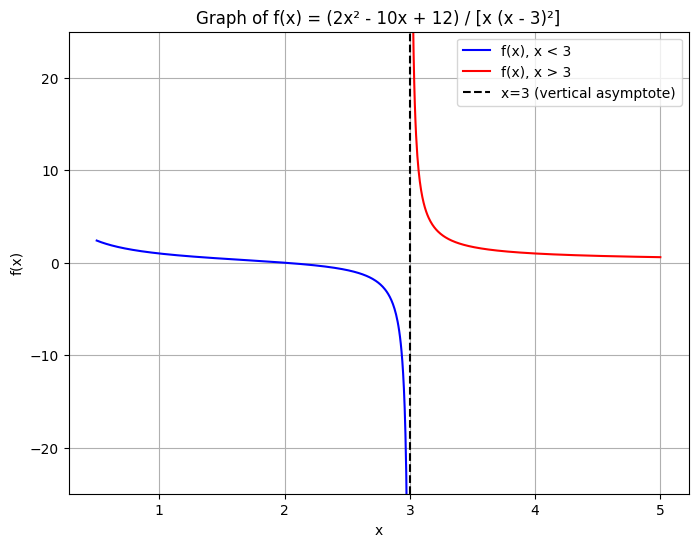

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (2*x**2 - 10*x + 12) / (x * (x - 3)**2)

# We'll plot in two segments around x=3 to avoid the singularity exactly at x=3.
x_left = np.linspace(0.5, 2.99, 400)    # from 0.5 to just before 3
x_right = np.linspace(3.01, 5, 400)     # from just after 3 to 5

plt.figure(figsize=(8, 6))

# Plot the function on the left side of x=3
plt.plot(x_left, f(x_left), 'b', label='f(x), x < 3')

# Plot the function on the right side of x=3
plt.plot(x_right, f(x_right), 'r', label='f(x), x > 3')

# Draw a vertical line at x=3 to show the asymptote
plt.axvline(x=3, color='k', linestyle='--', label='x=3 (vertical asymptote)')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) = (2x² - 10x + 12) / [x (x - 3)²]')
plt.grid(True)
plt.ylim(-25, 25)   # Adjust the y-limits to see the blow-up more clearly
plt.legend()
plt.show()


In [91]:
# figure 10.1 page # 205
class int_set(object):
    def __init__(self):
        self._elems = []
    def insert(self,elem):
        if elem not in self._elems:
            self._elems.append(elem)
    def remove(self,elem):
        try:
            self._elems.remove(elem)
        except:
            raise ValueError(str(elem),'not found')  
    def memeber(self,e):
        return e in self._elems 
    def get_members(self):
        return self._elems[:]
    def __add__(self,other):


        for e in other._elems:
            if e not in self._elems:
                self._elems.append(e)

               
        
    def __str__(self):
        if self._elems == []:
            return '{}'
        self._elems.sort()
        result = ''
        for e in self._elems:
            result += str(e)+','
        return f'{{{result[:-1]}}}' 
             

In [92]:
a = int_set()
b = int_set()



In [93]:
b.insert(1)
b.insert(2)
b.insert(6)
b.insert(7)
b.insert(10)
b.insert(5)

In [94]:
a.insert(1)
a.insert(3)
a.insert(4)
a.insert(8)
a.insert(9)
a.insert(5)

In [95]:
print(a)
print(b)

{1,3,4,5,8,9}
{1,2,5,6,7,10}


In [96]:
a+b
print(a)

{1,2,3,4,5,6,7,8,9,10}


In [97]:
l = [1,3,5,7,9]
m = [1,2,4,5,6,10]


In [98]:
s = []
for e in l:
    if e not in m:
        s.append(e)

s        

[3, 7, 9]

In [99]:
m+s

[1, 2, 4, 5, 6, 10, 3, 7, 9]